## <center>Introdução à Linguagem Python</center>
###  <center>Projeto de ensino - IFB</center>
---
## <center>13- Método de Euler Explícito - Mais de uma dimensão </center>
##### <center>Prof.: Bruno V. Ribeiro



# N-dimensões

Agora que vimos um método simples de resolução de equações diferenciais, podemos ir um pouco além e tentar utilizar o mesmo método para um sistema de equações.

A generalização do método para um sistema é bem direta, basta reinterpretarmos algumas variáveis. O tipo de problema que queremos resolver é

$\quad$

<div align="center"> $\mathbf{y}'(t) = \mathbf{f}(t, \mathbf{y}(t)), \quad \mathbf{y}(t_0) = \mathbf{y}_0$. </div>

Onde, agora, a variável $\mathbf{y}'(t)$ é um vetor, assim como $\mathbf{f}$. Ou seja, estamos lidando com um sistema de equações do tipo

$
\left\{
\begin{eqnarray}
y_1'(t) &=& f_1(t, \mathbf{y}(t)) \\
y_2'(t) &=& f_2(t, \mathbf{y}(t)) \\
y_3'(t) &=& f_3(t, \mathbf{y}(t)) \\
&...& \\
y_N'(t) &=& f_N(t, \mathbf{y}(t)) 
\end{eqnarray}
\right.
$

Onde

$\mathbf{y}(t) = (y_1(t), y_2(t), y_3(t), ... , y_N(t))$

e 

$\mathbf{f}(t, \mathbf{y}(t)) = (f_1(t, \mathbf{y}(t)), f_2(t, \mathbf{y}(t)), f_3(t, \mathbf{y}(t)), ... , f_N(t, \mathbf{y}(t)))$.

Aqui, $N$ é a dimensão do sistema de equações.

## Pêndulo simples

Vamos ver um exemplo rápido para entender o que é um sistema de equações diferenciais.

<img style="float: right;" src="https://thefactfactor.com/wp-content/uploads/2020/03/Simple-Pendulum-02.png">

Sem entrar em muitos detalhes (porque não é o foco aqui), ao lado temos um pêndulo simples. Ele é descrito pelo comprimento da corda ($L$) a massa do objeto ($m$) e suas condições iniciais. O que podemos dar como condição inicial é um valor para o ângulo inicial ($\theta_0$) e para sua velocidade inicial ($v_0$).

A força resultante na massa do pêndulo é dada por

$$ F_R = -mg\rm{sen} \theta$$

Reescrevendo, utilizando a 2ª Lei de Newton ($F_R = m. a$)

$$ a = -g\rm{sen} \theta \rightarrow \dot{v} = -g\rm{sen}\theta \rightarrow \ddot{x} = -g\rm{sen}\theta$$

Aqui usamos a notação com ponto ($\dot{y}$) como derivada temporal. Isso é uma equação de segunda ordem (que ainda não sabemos resolver numericamente). Mas, equações de segunda ordem podem ser transformadas em sistemas de equações de primeira ordem (isso é um resultado geral, que não demonstraremos aqui...).

Como fazer? Bom, se vocês se lembrarem de movimento de rotação, nos definimos a velocidade angular ($\omega$) como a variação temporal do ângulo de rotação ($\theta$, no caso). Ou seja, $\dot{\theta} = \omega$. Também definimos a aceleração angular como a variação da velocidade angular ($\dot{\omega}$). E, temos a relação entre velocidade e velocidade angular dada por $v = \omega . L$.

Juntando essa bomba de informação, podemos escrever a aceleração da seguinte maneira:

$$ a =  \dot{v} = -g\rm{sen}\theta$$
$$ a =  \dot{\omega}.L = -g\rm{sen}\theta$$.

Com isso, podemos escever a equação de segunda ordem em $x$ como duas equações acopladas (sistema) para as coordenadas $(\theta, \omega)$:


$$\left\{
\begin{array}{lcl}
\dot{\theta} = \omega
\\
\\
\dot{\omega} = (\dot{ v}/L) = - \frac{g}{L} \mathrm{sen}\theta
\end{array}
\right.$$

Usando a linguagem que mostramos no começo deste documento:
$\mathbf{y}(t) = (\theta(t), \omega(t))$ e $\mathbf{f}(t, \mathbf{y}(t)) = (\omega, - \frac{g}{L} \mathrm{sen}\theta)$

# Aplicando o MEE

Sabendo escrever um problema em mais de uma dimensão, como aplicar o nosso MEE. Bom, agora é apenas reinterpretar as coisas!

Nosso sistema é dado por

<div align="center"> $\mathbf{y}'(t) = \mathbf{f}(t, \mathbf{y}(t)), \quad \mathbf{y}(t_0) = \mathbf{y}_0$. </div>

Seguindo a mesma lógica que utilizamos para demonstrar o MEE em uma dimensão, chegamos ao mesmo algoritmo:

> $\mathbf{y}_{n+1} = \mathbf{y}_n + h \cdot \mathbf{f}(t_n, \mathbf{y}_n) $

onde as grandezas em negrito são vetores.

## Exemplo de implementação - Pêndulo

Vamos implementar nosso método ao Pêndulo simples descrito acima. Começamos importanto os módulos relevantes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Para definir o passo do MEE, vamos usar EXATAMENTE a mesma função do último documento:

In [2]:
def mee(f, y_n, t_n, h):
    y = y_n + f(t_n, y_n)*h
    return y

A diferença será que as variáveos `f` e `y_n` serão arrays ou listas (objetos com mais de uma entrada - vetores). Vamos definir nossa função `f`:

In [3]:
# Definir constantes globais
g = 10.0
L = 1

def f(t, y):
    # theta: y[0], omega: y[1]
    f_1 = y[1]                  # theta(ponto) = omega
    f_2 = -(g/L)*np.sin(y[0])   # omega(ponto) = -(g/L).sen(theta)
    
    F = np.array([f_1, f_2])    # Definindo um array representando o vetor f
    
    return F

Agora vamos criar nossa evolução no tempo EXATAMENTE como fizemos antes:

In [4]:
# Definindo constantes:
h = 0.001                                 # Passo no tempo
y0 = np.array([np.pi/6, 0.0])             # Condição inicial (theta_0, omega_0)
t0 = 0.0
t_max = 10

# A variável t será usada para acompanhar o "tempo atual"
t = t0

# A variável y será usada como o valor de y no "tempo atual"
y = y0

# Criaremos um array para armazenar todos os valores de theta e outro para omega ao longo do tempo
theta_t = np.array([y0[0]])
omega_t = np.array([y0[1]])

# Vamos criar um array para armazenar os valores do tempo também
t_t = np.array([t0])      # O primeiro elemento desta lista será o t0


while t <= t_max:
    # Incrementando o valor de y usando a expressão (1)
    y = mee(f, y, t, h)
    
    # Incrementando o tempo
    t += h

    # Armazenando o valor de theta e omega no array
    theta_t = np.append(theta_t, y[0])
    omega_t = np.append(omega_t, y[1])

    # Armazenando o valor de t no array
    t_t = np.append(t_t, t)


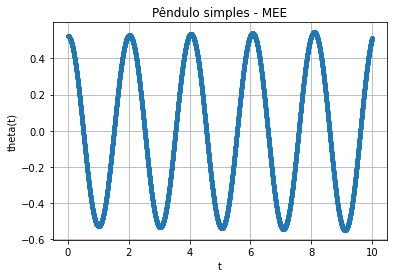

In [5]:
plt.plot(t_t, theta_t, '.-')
plt.title("Pêndulo simples - MEE")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.grid()
plt.show()

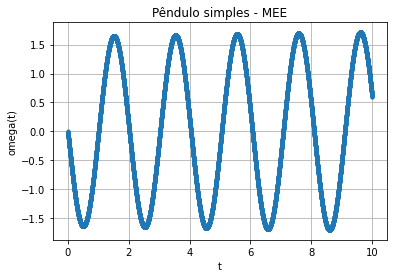

In [6]:
plt.plot(t_t, omega_t, '.-')
plt.title("Pêndulo simples - MEE")
plt.xlabel("t")
plt.ylabel("omega(t)")
plt.grid()
plt.show()

Como esperado, tanto $\theta$ quanto $\omega$ oscilam no tempo (vocês conseguem resolver o sistema "na mão" e ver qual é a solução para comparação). Vejam o que acontece se plotarmos $\omega$ por $\theta$, no que chamamos de "retrato de fases". (Foje muitoao escopo deste projeto, mas podemos aprofundar para quem desejar - eu acho maravilhoso).

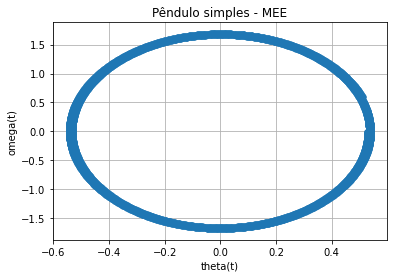

In [7]:
plt.plot(theta_t, omega_t, '.-')
plt.title("Pêndulo simples - MEE")
plt.xlabel("theta(t)")
plt.ylabel("omega(t)")
plt.grid()
plt.show()

Notem que este é um sistema bem não linear e o nosso método é bem rudimentar. Se repetirmos tudo com um passo de tempo maior (usarmos `h` igual a 0.1, por exemplo) começamos a ver a fragilidade do MEE:

In [8]:
# Definindo constantes:

#############################
######### MUDEI O h #########
#############################
h = 0.1                                 # Passo no tempo
y0 = np.array([np.pi/6, 0.0])             # Condição inicial (theta_0, omega_0)
t0 = 0.0
t_max = 10

# A variável t será usada para acompanhar o "tempo atual"
t = t0

# A variável y será usada como o valor de y no "tempo atual"
y = y0

# Criaremos um array para armazenar todos os valores de theta e outro para omega ao longo do tempo
theta_t = np.array([y0[0]])
omega_t = np.array([y0[1]])

# Vamos criar um array para armazenar os valores do tempo também
t_t = np.array([t0])      # O primeiro elemento desta lista será o t0


while t <= t_max:
    # Incrementando o valor de y usando a expressão (1)
    y = mee(f, y, t, h)
    
    # Incrementando o tempo
    t += h

    # Armazenando o valor de theta e omega no array
    theta_t = np.append(theta_t, y[0])
    omega_t = np.append(omega_t, y[1])

    # Armazenando o valor de t no array
    t_t = np.append(t_t, t)

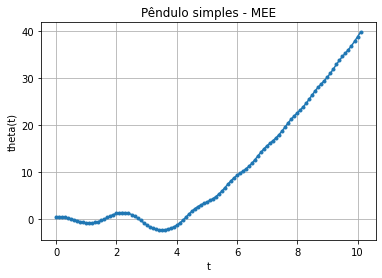

In [9]:
plt.plot(t_t, theta_t, '.-')
plt.title("Pêndulo simples - MEE")
plt.xlabel("t")
plt.ylabel("theta(t)")
plt.grid()
plt.show()

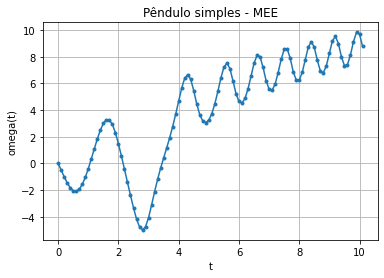

In [10]:
plt.plot(t_t, omega_t, '.-')
plt.title("Pêndulo simples - MEE")
plt.xlabel("t")
plt.ylabel("omega(t)")
plt.grid()
plt.show()

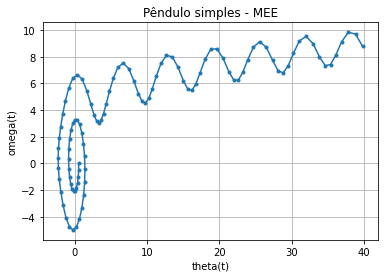

In [11]:
plt.plot(theta_t, omega_t, '.-')
plt.title("Pêndulo simples - MEE")
plt.xlabel("theta(t)")
plt.ylabel("omega(t)")
plt.grid()
plt.show()

Este tipo de erro é um erro de precisão do método e, por isso, devemos tomar MUITO cuidado com as escolhas de parâmetros (como o `h`). Neste caso, olhando para os gráficos sabemos que algo está errado e não está associado ao sistema Físico (ou ao sistema de equações, mesmo que não esteja associado a um sistema Físico específico). Mas, nos casos de equações mais complexas onde não conhecemos as soluções analíticas, precisamos ficar atentos para não confundir comportamento das soluções com possíveis erros numéricos como este.

## Exemplo de implementação - Modelo SIR


Um exemplo bem legal (e bem importante na atualidade) é o modelo epidemiológico SIR. Se trata de um modelo matemático para análise e, possível, controle de doenças infecciosas. Não vamos entrar muito a fundo nos detalhes do modelo aqui (apesar de ser MUITO interessante) mas podemos definir as equações que o regem e implementar um algoritmo para acompanhar sua dinâmica.

Quem se interessar um pouco mais por este modelo, recomendo esta leitura leve e bem introdutória ao assunto:
[Análise do modelo SIR - TCC de curso de Matemática Aplicada](https://www.ime.usp.br/~map/tcc/2019/MilenaHeidecherV2.pdf).

Vamos apresentar o modelo e estudar a implementação numérica de sua dinâmica:

### O Modelo

O modelo acompanha a evolução temporal de três populações:
* SUSCETÍVEIS (S): Pessoas que podem pegar a doença caso ocorra algum contato com o vírus ou bactéria;
* INFECTADOS (I): Pessoas que estão doentes;
* REMOVIDOS (R): Pessoas que se recuperaram da doença ou morreram decorrente dela, portanto não a transmitem.

A dinâmica, ainda, é governada por dois parâmetros:
* $\beta$: coeficiente de transmissão
* $\gamma$: taxa de recuperação.

Uma interpretação rápida destes parâmetros é dada a partir do contato entre indivíduos de cada população:

A cada instante há um número $S.I$ de pares suscetíveis-infectados. Ou seja, quando um indivíduo infectado entra em contato com um suscetível, ele transmite a doença, portanto reduz o número de suscetíveis e aumenta o número de infectados. Podemos interpretar isso como um fluxo de indivíduos da classe $S$ para a classe $I$. Esse fluxo deve ser proporcional ao número de pares $S.I$. A constante que fornece essa proporcionalidade é o que chamamos de coeficiente de transmissão ($\beta$).

Por outro lado, o número de infectados diminui a uma taxa que denominamos de $\gamma$. Esta taxa inclui recuperação da doença, morte ou qualquer outra forma de exclusão do indivíduo da classe de infectados.

Podemos representar essa dinâmica utilizando um diagrama:

<img src="https://www.lewuathe.com/assets/img/posts/2020-03-11-covid-19-dynamics-with-sir-model/sir.png">

Com uma notação de equações diferenciais, podemos "traduzir" esse esquema no seguinte sistema de equações:


$$\left\{
\begin{array}{lcl}
\dot{S} = -\beta S I
\\
\dot{I} = \beta S I - \gamma I
\\
\dot{R} = \gamma I
\end{array}
\right.$$

## Implementando o modelo SIR

A escolha dos parâmetros não é arbitrária aqui, mas não vou entrar nos detalhes. Quem se interessar pelo modelo, esta é uma boa oportunidade de pensar no trabalho final deste projeto.

Vai ficar como tarefa para vocês acompanhar a implementação abaixo, não vou comentar tanto quanto a anterior (até porque são bem similares). Qualquer dúvida, me procurem!

In [36]:
# Definindo constantes:
beta = 0.0013020833333333333
gamma = 0.008333333333333333
h = 0.1
y0 = np.array([50.0, 1.0, 0.0])
t0 = 0.0
t_max = 1000

In [37]:
def mee(f, y_n, t_n, h):
    y = y_n + f(t_n, y_n)*h
    return y

In [38]:
def f(t, y):
    # S: y[0], I: y[1], R: y[2]
    S = -beta*y[0]*y[1]
    I = beta*y[0]*y[1] - gamma*y[1]
    R = gamma*y[1]
    
    F = np.array([S,I,R])
    
    return F

In [39]:
# A variável t será usada para acompanhar o "tempo atual"
t = t0

# A variável y será usada como o valor de y no "tempo atual"
y = y0

# Criaremos um array para armazenar todos os valores de y ao longo do tempo
y_t = [y0]      # O primeiro elemento desta lista será o y0

# Vamos criar um array para armazenar os valores do tempo também
t_t = np.array([t0])      # O primeiro elemento desta lista será o t0

count = 0
while t <= t_max:
    # Incrementando o valor de y usando a expressão (1)
    y = mee(f, y, t, h)
    
    # Incrementando o tempo
    t += h
    count += 1
    
    
    if count == 100:
        # Armazenando o valor de y no array
        y_t.append(y)

        # Armazenando o valor de t no array
        t_t = np.append(t_t, t)
        
        # Reiniciando o contador
        count = 0

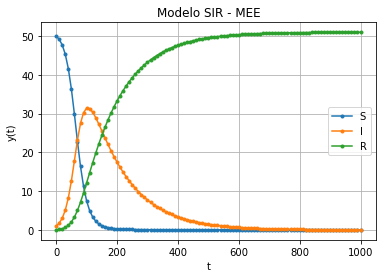

In [40]:
plt.plot(t_t, y_t, '.-')
plt.title("Modelo SIR - MEE")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(["S","I","R"])
plt.grid()
plt.show()

A curva de $I$ é a curva de infectados, que possui um pico seguido de uma queda lenta. Por sinal, esta é a curva que estamos tentando "achatar" desde o início do isolamento social devido ao COVID-19.